In this notebook we want to achieve just one thing: create the capability to visualize the images in our dataset along with the ground-truth handball pitch overlaid on them. To do that we will need a couple of things:
    - Find a way to import HandballPitch python class from the notebook: https://gifted-rune-places-p8vger.solve.it.com/dialog_?name=handball_pitch_dup1. We should import the class along with all the methods defined for it(we used the @patch decorator in that notebook in order to link some specific functions to the HandballPitch class)
    - Upload the clean_keypoints_dataset(as a zip, then unzip it here in the notebook, using terminal commands here in the notebook(ask claude how)
    - implement two functions: one that just shows an image from the dataset(the image path or name given as its argument/parameter) along with all the annotated keypoints for that image, plotted on the image. the second function also shows a random image from the dataset but this time it calls the HandballPitch's warp_pitch_to_image() method which will plot the image along with the warped 2d pitch. That functions receives img_pts dict as param, calculates the homography between the 2d handball pitch in the image and the ground truth 2d handball pitch and then warps the ground truth handball pitch, overlaying it on the image. The important thing is that the img_pts dict received as parameter contains the points we have in the .json annotation file for our image. Here is an example of how img_pts must look like:
   
   img_pts = dict(corner_right_up=(1162.2,317.1), six_goalline_right_up=(1253,357.9), goal_post_right_down=(1704.3, 554.2 ), four_right_down=(1262, 559 )). 
   
   
   As you may notice the important thing here is to correctly map the annotations we have in the json(the ones we made in labelme), looking like this:

   '''
    {
      "label": "13",
      "points": [
        [
          833.4,
          444.1
        ]
      ],
      "group_id": null,
      "description": "",
      "shape_type": "point",
      "flags": {},
      "mask": null
    },
    {
      "label": "24",
      "points": [
        [
          549.2,
          603.4
        ]
      ],
      "group_id": null,
      "description": "",
      "shape_type": "point",
      "flags": {},
      "mask": null
    },
    '''
    to the correct key inside the img_pts dict. For that we actually have inside the HandballPitch class this dict: keypoint_ids(HandballPitch.keypoint_ids) This dict will map from int values, e.g. 24, to string values, like goal_post_left_down. the img_pts will have the string values as keys so that's why we need this mapping.


how can i see the file explorer of this notebook?



##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

In solveit, you can view files in your instance using terminal commands. Try running this in a code message:

```python
!ls
```

This will list all files and directories in your current working directory. If you want to see more details (like file sizes and permissions), you can use:

```python
!ls -lah
```

To navigate to different directories or see what's in subdirectories, you can use commands like `!ls path/to/directory`.

Would you like to check what's currently in your working directory?

how can i import a class from another notebook?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

There are a few approaches to import code from another solveit notebook:

1. **Export as a Python module**: Save the class code from the other notebook as a `.py` file, then import it normally
2. **Use nbformat**: Load and execute the other notebook programmatically
3. **Copy the code**: Simply copy the class definition into your current notebook

The simplest approach is usually #1. In the other notebook, you could save the `HandballPitch` class to a file:

```python
# In the other notebook
!cat > handball_pitch.py << 'EOF'
# paste your HandballPitch class code here
EOF
```

Then in your current notebook:

```python
from handball_pitch import HandballPitch
```

Which approach would you prefer, or would you like me to show you how to do one of these in more detail?

and does this also save the functions of the class?


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! When you save a class definition to a `.py` file, it includes everything defined in that class:

- All methods (functions inside the class)
- Class attributes
- The `__init__` method
- Any decorators applied to the methods

However, there's one important thing to note: if you used the `@patch` decorator (from fastcore) to add methods to the class *after* the class was defined, you'll need to include those `@patch` decorated functions in the `.py` file too.

So you'd save both the original class definition AND all the `@patch` decorated functions to the same file.

Does your `HandballPitch` class use the `@patch` decorator for some of its methods?

yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Then you'll need to include both in the `.py` file:

1. The original `HandballPitch` class definition
2. All the `@patch` decorated functions below it

They should be in the same order as in the original notebook. The `@patch` decorator will automatically attach those functions to the class when the module is imported.

Would you like help creating the `.py` file, or do you want to try it yourself first?

show me how to include the functions the same way you showed me how to save the class

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Sure! Here's how to save both the class and the `@patch` functions to a file:

```python
!cat > handball_pitch.py << 'EOF'
from fastcore.basics import patch

class HandballPitch:
    # your class definition here
    def __init__(self, ...):
        # init code
        pass

@patch
def warp_pitch_to_image(self:HandballPitch, img_pts):
    # your patched method code here
    pass

@patch
def another_method(self:HandballPitch, ...):
    # another patched method
    pass
EOF
```

The key points:
- Import `patch` at the top
- Include the class definition first
- Then add all your `@patch` decorated functions below it

Want to try creating it with your actual code, or would you like more guidance?

so i do a code cell that includes all the code from the class but with !cat > handball_pitch.py << 'EOF' above it and then run it?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Exactly! You've got it. 

Just make sure to add `EOF` at the very end of the code cell to close the heredoc syntax. So it looks like:

```python
!cat > handball_pitch.py << 'EOF'
# all your class code and @patch functions here
EOF
```

Then run that cell, and it will create the `handball_pitch.py` file in your current directory.

do i need to also import the other libraries used in the code?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! You need to include all the import statements that the class and its methods use. Put them at the top of the file, before the class definition.

For example, if your `HandballPitch` class uses `numpy`, `matplotlib`, `cv2`, etc., include those:

```python
!cat > handball_pitch.py << 'EOF'
import numpy as np
import matplotlib.pyplot as plt
import cv2
from fastcore.basics import patch

class HandballPitch:
    # class code...
EOF
```

Do you know which libraries your `HandballPitch` code uses?

i get this error
NameError: name 'EOF' is not defined
/bin/bash: line 1: warning: here-document at line 1 delimited by end-of-file (wanted `EOF')

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

This error means the `EOF` at the end is missing or not formatted correctly. 

Make sure:
1. The closing `EOF` is on its own line
2. There's no indentation or spaces before `EOF`
3. It's not inside a Python string or comment

The structure should be:

```python
!cat > handball_pitch.py << 'EOF'
your code here
EOF
```

Can you check if your closing `EOF` is on a separate line by itself with no extra spaces?

it is

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

That's strange. Can you share the exact code from your cell so I can see what might be wrong? Just copy and paste the first few lines and the last few lines of what you're running.

!cat > handball_pitch.py << 'EOF'
from fastcore.basics import patch
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import cv2
import numpy as np

class HandballPitch:
    PITCH_LENGTH = 40.0
    PITCH_WIDTH = 20.0
    GOAL_WIDTH = 3.0
    GOAL_AREA_DISTANCE = 6.0
    FREE_THROW_DISTANCE = 9.0
    PENALTY_DISTANCE = 7.0
    GOALKEEPER_DISTANCE = 4.0
    PENALTY_LINE_LENGTH = 1.0
    GOALKEEPER_LINE_LENGTH = 0.15
    FREE_THROW_SIDELINE_INTERSECTION_LENGTH = 2.958
    CENTER_CIRCLE_RADIUS = 2.0

    def __init__(self):
###code


    if ax is None: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(img)
    ax.imshow(warped, alpha=0.5)
    ax.set_axis_off()
    return ax       
EOF    

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

I see the issue! You have `###code` as a placeholder in the middle of your code. Python is trying to interpret that and everything after it, which breaks the heredoc syntax.

You need to replace `###code` with the actual code from your class. The heredoc won't work with incomplete or placeholder code - it needs to be valid Python.

Can you go back to the original notebook and copy the complete `__init__` method and all the other methods to replace that `###code` section?

no, in the actual code there is no ###code, i just put it here to show you there is code in between

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Ah, I understand! So your actual code is complete between those sections.

In that case, the issue might be that solveit is interpreting this as Python code rather than a shell command. Try putting the entire thing in a code cell as a shell script, or try this alternative approach - save it as a Python string and write it to a file:

```python
code = '''from fastcore.basics import patch
import matplotlib.pyplot as plt
# ... rest of your code here ...
'''

with open('handball_pitch.py', 'w') as f:
    f.write(code)
```

Would you like to try this approach instead?

ok it worked. how do i import the class and functions here?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Now you can import it like this:

```python
from handball_pitch import HandballPitch
```

Try running that in a code cell. If it works, you should be able to use the class and all its methods (including the `@patch` ones).

In [ ]:
from handball_pitch import HandballPitch

ModuleNotFoundError: No module named 'handball_pitch'

it doesnt see the module

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's check if the file was created successfully:

```python
!ls -la handball_pitch.py
```

This will show if the file exists and its size. If it's there, we might need to check if you're in the right directory or if there's a syntax error in the file.

the file is there

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

If the file exists, there might be a syntax error in it. Let's check if Python can parse it:

```python
!python -m py_compile handball_pitch.py
```

This will tell us if there are any syntax errors. What does it say?

should i run this in the notebook or in the terminal?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Run it in the notebook as a code cell (the `!` prefix means it will execute as a shell command). Just paste it into a code cell and run it.

In [ ]:
!python -m py_compile handball_pitch.py

nothing happens when i run it

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good! No output means there are no syntax errors in the file.

Now try importing again:

```python
from handball_pitch import HandballPitch
```

If it still doesn't work, we might need to restart the Python kernel (click the "Stop" button) since Python caches module imports.

In [ ]:
from handball_pitch import HandballPitch

ModuleNotFoundError: No module named 'handball_pitch'

should this notebook be saved or anything? but i can see it in the file explorer

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The notebook doesn't need to be saved for this to work - the `.py` file is separate.

Let's check what directory Python is looking in:

```python
import sys
print(sys.path[0])
```

And also verify where the file actually is:

```python
!pwd
```

This will help us see if there's a path mismatch.

In [ ]:
!pwd

/app/data


In [ ]:
import sys
print(sys.path[0])

/usr/local/lib/python312.zip


the file is in app/data and python is looking in /usr/local/lib/python312.zip

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The issue is that Python's first search path is pointing to that zip file instead of your current directory. Let's add the current directory to Python's path:

```python
import sys
sys.path.insert(0, '/app/data')
```

Then try importing again:

```python
from handball_pitch import HandballPitch
```

In [ ]:
import sys
sys.path.insert(0, '/app/data')

In [ ]:
from handball_pitch import HandballPitch

i think it worked cause i have no output

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's verify it worked by checking if the class is available:

```python
pitch = HandballPitch()
```

Try creating an instance - if it works without errors, you're all set!

In [ ]:
pitch = HandballPitch()

no output, did this work?


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! No output means it worked perfectly. The `HandballPitch` instance was created successfully.

You can verify by checking the instance:

```python
print(pitch)
print(type(pitch))
```

Or try accessing one of its attributes or methods to confirm everything imported correctly. What would you like to do next with it?

In [ ]:
print(pitch)
print(type(pitch))

from the folder clean_keypoints_dataset delete all images starting with "frame"

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You can delete those files using a shell command. Try this:

```python
!rm clean_keypoints_dataset/frame*
```

This will remove all files in that folder that start with "frame". Want to first check which files will be deleted before running it?

In [ ]:
!rm clean_keypoints_dataset/frame*

from this dataset i want to read images and their annotations (json). i want a function that takes as argument the name of the image and prints the image with the annotated points drawn on the image

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good goal! Let's break this down into steps:

1. Load the image using something like `PIL` or `cv2`
2. Read the corresponding JSON file
3. Extract the points from the JSON
4. Plot the image with points overlaid

Which step would you like to start with? Or would you prefer I show you the complete function?

show the complete function

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's a complete function to visualize an image with its annotated points:

```python
import json
from PIL import Image
import matplotlib.pyplot as plt

def show_image_with_keypoints(image_name, dataset_path='clean_keypoints_dataset'):
    # Load image
    img_path = f"{dataset_path}/{image_name}"
    img = Image.open(img_path)
    
    # Load corresponding JSON
    json_path = img_path.replace('.jpg', '.json').replace('.png', '.json')
    with open(json_path, 'r') as f:
        data = json.load(f)
    
    # Plot image
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(img)
    
    # Plot each keypoint
    for shape in data['shapes']:
        point = shape['points'][0]  # Each point is [[x, y]]
        label = shape['label']
        ax.plot(point[0], point[1], 'ro', markersize=8)
        ax.text(point[0], point[1], label, color='yellow', fontsize=10)
    
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()
```

Try it out with one of your images!

does this give an error if there is no json for an image?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes, it will give a `FileNotFoundError` if the JSON file doesn't exist. 

Would you like me to add error handling to catch that case and show a helpful message instead?

yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's the function with error handling added:

```python
import json
from PIL import Image
import matplotlib.pyplot as plt

def show_image_with_keypoints(image_name, dataset_path='clean_keypoints_dataset'):
    # Load image
    img_path = f"{dataset_path}/{image_name}"
    
    try:
        img = Image.open(img_path)
    except FileNotFoundError:
        print(f"Image not found: {img_path}")
        return
    
    # Load corresponding JSON
    json_path = img_path.replace('.jpg', '.json').replace('.png', '.json')
    
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"JSON annotation not found: {json_path}")
        return
    
    # Plot image
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(img)
    
    # Plot each keypoint
    for shape in data['shapes']:
        point = shape['points'][0]
        label = shape['label']
        ax.plot(point[0], point[1], 'ro', markersize=8)
        ax.text(point[0], point[1], label, color='yellow', fontsize=10)
    
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()
```

Now it will show a clear message if either file is missing!

In [ ]:
import json
from PIL import Image
import matplotlib.pyplot as plt
from adjustText import adjust_text

def show_image_with_keypoints(image_name, dataset_path='clean_keypoints_dataset'):
    img_path = f"{dataset_path}/{image_name}"
    
    try:
        img = Image.open(img_path)
    except FileNotFoundError:
        print(f"Image not found: {img_path}")
        return
    
    json_path = img_path.replace('.jpg', '.json').replace('.png', '.json')
    
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"JSON annotation not found: {json_path}")
        return
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(img)
    
    texts = []
    for shape in data['shapes']:
        label = shape['label']
        points = shape['points']
        shape_type = shape['shape_type']
        
        if shape_type == 'linestrip':
            xs = [p[0] for p in points]
            ys = [p[1] for p in points]
            ax.plot(xs, ys, 'r-', linewidth=2)
            texts.append(ax.text(points[0][0], points[0][1], label, color='yellow', fontsize=10))
        elif shape_type == 'point':
            ax.plot(points[0][0], points[0][1], 'ro', markersize=8)
            texts.append(ax.text(points[0][0], points[0][1], label, color='yellow', fontsize=10))
    
    adjust_text(texts, ax=ax)
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()


all images contain points but also lines drawn from multiple points with the same label. can you make the function to draw the lines?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! I can modify it to draw lines connecting points with the same label. 

The approach would be:
1. Group points by their label
2. For each group with multiple points, draw lines connecting them

Should I update the function to do this automatically, or would you like to try implementing the grouping part yourself first?

do it

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's the updated function that draws lines connecting points with the same label:

```python
import json
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict

def show_image_with_keypoints(image_name, dataset_path='clean_keypoints_dataset'):
    # Load image
    img_path = f"{dataset_path}/{image_name}"
    
    try:
        img = Image.open(img_path)
    except FileNotFoundError:
        print(f"Image not found: {img_path}")
        return
    
    # Load corresponding JSON
    json_path = img_path.replace('.jpg', '.json').replace('.png', '.json')
    
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"JSON annotation not found: {json_path}")
        return
    
    # Plot image
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(img)
    
    # Group points by label
    label_points = defaultdict(list)
    for shape in data['shapes']:
        point = shape['points'][0]
        label = shape['label']
        label_points[label].append(point)
    
    # Plot points and lines
    for label, points in label_points.items():
        # Draw lines if multiple points with same label
        if len(points) > 1:
            xs = [p[0] for p in points]
            ys = [p[1] for p in points]
            ax.plot(xs, ys, 'r-', linewidth=2)
        
        # Draw points
        for point in points:
            ax.plot(point[0], point[1], 'ro', markersize=8)
            ax.text(point[0], point[1], label, color='yellow', fontsize=10)
    
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()
```

Try it now and see if it draws the lines correctly!

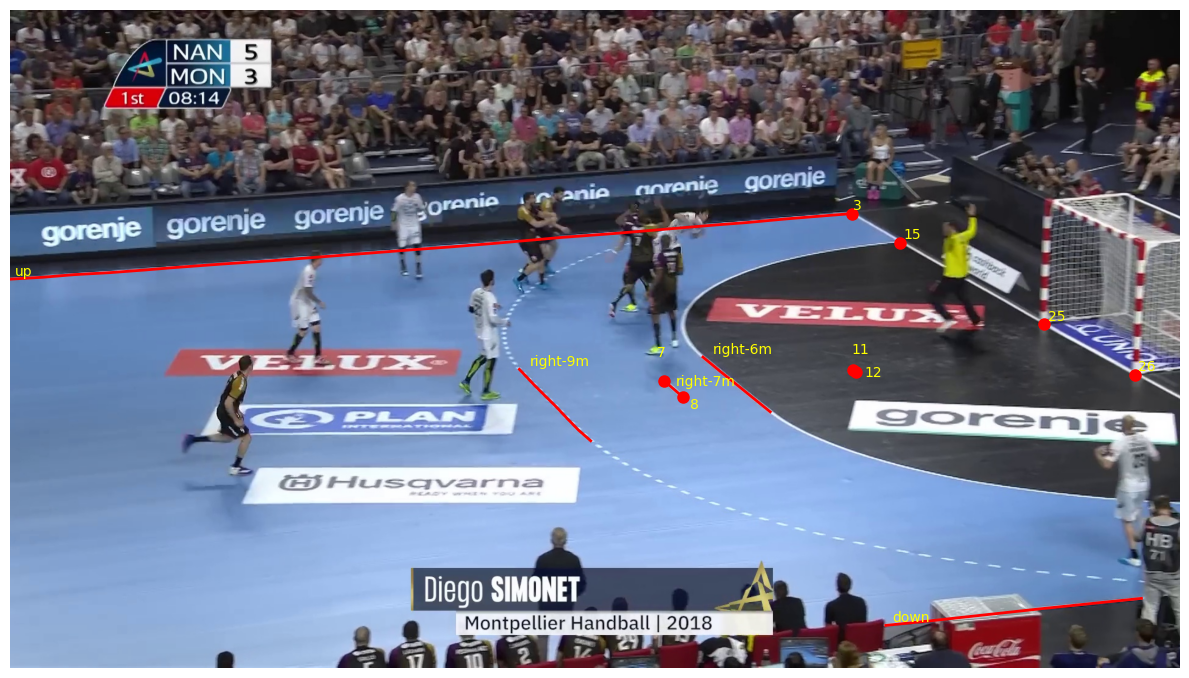

In [ ]:
show_image_with_keypoints("61.jpg")

the output is the same, it didnt draw lines

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let me check the JSON structure. Can you run this to see what the data looks like?

```python
import json
with open('clean_keypoints_dataset/61.json', 'r') as f:
    data = json.load(f)
print(data['shapes'][:3])  # Show first 3 shapes
```

This will help us see if points with the same label are actually present in the file.

In [ ]:
import json
with open('clean_keypoints_dataset/61.json', 'r') as f:
    data = json.load(f)
print(data['shapes'][:3])  # Show first 3 shapes

[{'label': '3', 'points': [[1380.7977207977208, 333.73219373219376]], 'group_id': None, 'description': None, 'shape_type': 'point', 'flags': {}, 'mask': None}, {'label': 'up', 'points': [[1.2715517241378507, 441.2931034482758], [52.995689655172356, 438.27586206896547], [104.90740740740758, 433.9814814814815], [163.12499999999991, 430.73275862068965], [219.80603448275858, 426.4224137931035], [274.351851851852, 421.94444444444446], [350.27777777777794, 416.3888888888889], [432.7118644067797, 410.8474576271186], [488.98305084745755, 406.44067796610165], [592.4579831932772, 398.4033613445378], [656.7436974789915, 393.3613445378151], [721.6596638655461, 388.5294117647059], [795.843373493976, 382.5451807228916], [906.660482374768, 372.74582560296847], [989.1808873720137, 366.6211604095563], [1155.935582822086, 352.5766871165644], [1208.3679525222553, 348.53115727002967], [1272.314540059347, 342.59643916913944], [1320.6824925816024, 338.59050445103856], [1380.0, 333.90000000000003]], 'group_i

[{'label': '3', 'points': [[1380.7977207977208, 333.73219373219376]], 'group_id': None, 'description': None, 'shape_type': 'point', 'flags': {}, 'mask': None}, {'label': 'up', 'points': [[1.2715517241378507, 441.2931034482758], [52.995689655172356, 438.27586206896547], [104.90740740740758, 433.9814814814815], [163.12499999999991, 430.73275862068965], [219.80603448275858, 426.4224137931035], [274.351851851852, 421.94444444444446], [350.27777777777794, 416.3888888888889], [432.7118644067797, 410.8474576271186], [488.98305084745755, 406.44067796610165], [592.4579831932772, 398.4033613445378], [656.7436974789915, 393.3613445378151], [721.6596638655461, 388.5294117647059], [795.843373493976, 382.5451807228916], [906.660482374768, 372.74582560296847], [989.1808873720137, 366.6211604095563], [1155.935582822086, 352.5766871165644], [1208.3679525222553, 348.53115727002967], [1272.314540059347, 342.59643916913944], [1320.6824925816024, 338.59050445103856], [1380.0, 333.90000000000003]], 'group_id': None, 'description': '', 'shape_type': 'linestrip', 'flags': {}, 'mask': None}, {'label': '15', 'points': [[1459.6372430471586, 381.7170495767836]], 'group_id': None, 'description': '', 'shape_type': 'point', 'flags': {}, 'mask': None}]

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Ah, I see the issue! The lines are already stored as `'linestrip'` shapes with multiple points in a single entry, not as separate points with the same label.

So we need to handle two different `shape_type` values:
- `'point'` - single keypoint
- `'linestrip'` - multiple points forming a line

Should I update the function to handle both types?

yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's the updated function that handles both point and linestrip types:

```python
import json
from PIL import Image
import matplotlib.pyplot as plt

def show_image_with_keypoints(image_name, dataset_path='clean_keypoints_dataset'):
    # Load image
    img_path = f"{dataset_path}/{image_name}"
    
    try:
        img = Image.open(img_path)
    except FileNotFoundError:
        print(f"Image not found: {img_path}")
        return
    
    # Load corresponding JSON
    json_path = img_path.replace('.jpg', '.json').replace('.png', '.json')
    
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"JSON annotation not found: {json_path}")
        return
    
    # Plot image
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(img)
    
    # Plot each shape
    for shape in data['shapes']:
        label = shape['label']
        points = shape['points']
        shape_type = shape['shape_type']
        
        if shape_type == 'linestrip':
            # Draw line connecting all points
            xs = [p[0] for p in points]
            ys = [p[1] for p in points]
            ax.plot(xs, ys, 'r-', linewidth=2)
            # Label at first point
            ax.text(points[0][0], points[0][1], label, color='yellow', fontsize=10)
        elif shape_type == 'point':
            # Draw single point
            ax.plot(points[0][0], points[0][1], 'ro', markersize=8)
            ax.text(points[0][0], points[0][1], label, color='yellow', fontsize=10)
    
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()
```

Try it now!

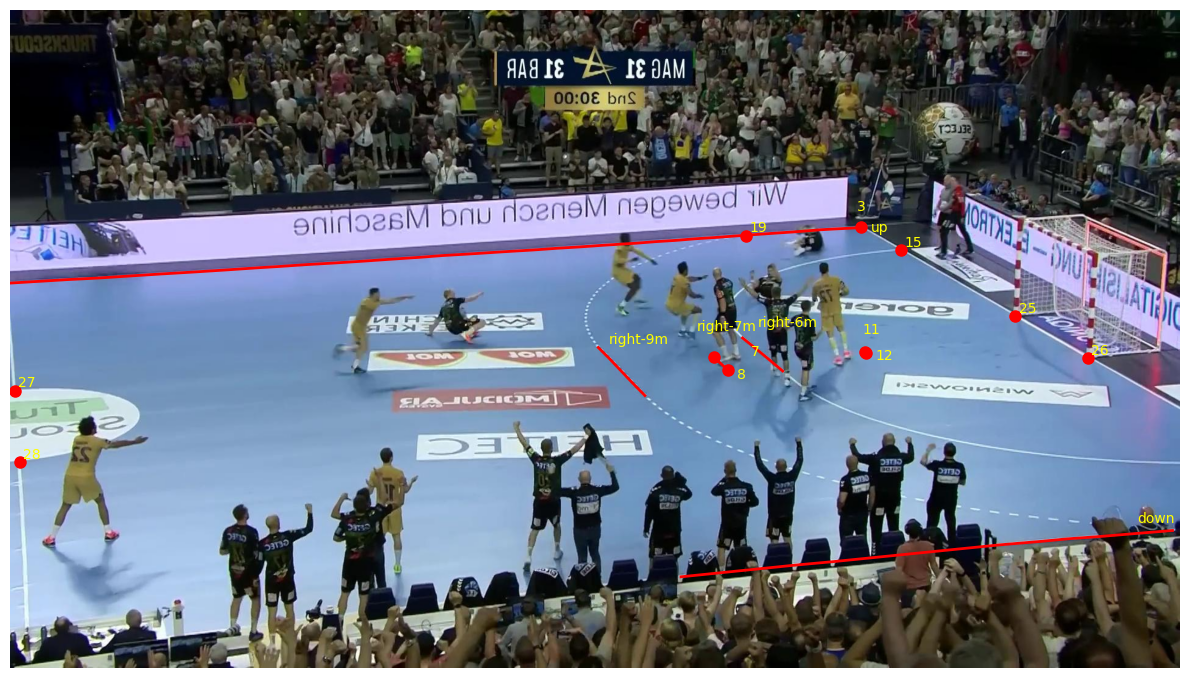

In [ ]:
show_image_with_keypoints("79_h.jpg")

how can i check that all images are annotated correctly by using this funciton but without printing all of them in this notebook 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You could loop through all images and check programmatically instead of displaying them. Here are a few approaches:

1. **Print summary info** - count keypoints/lines for each image without showing the image
2. **Save visualizations to files** - create image files you can review outside the notebook
3. **Interactive navigation** - show one image at a time with next/previous controls

Which approach sounds most useful for your needs?

3

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great choice! For interactive navigation, you could use `ipywidgets` to create next/previous buttons, but those don't work in solveit.

Instead, we can create a simple approach where you call a function that keeps track of which image you're viewing and shows the next one each time. Would you like me to show you how to implement that?

yes and iterate through all images in the folder that have a json with the same name

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's a simple image viewer that lets you iterate through your annotated images:

```python
import os

class ImageViewer:
    def __init__(self, dataset_path='clean_keypoints_dataset'):
        self.dataset_path = dataset_path
        # Get all images that have corresponding JSON files
        all_files = os.listdir(dataset_path)
        images = [f for f in all_files if f.endswith(('.jpg', '.png'))]
        self.images = [img for img in images if img.replace('.jpg', '.json').replace('.png', '.json') in all_files]
        self.index = 0
        print(f"Found {len(self.images)} annotated images")
    
    def next(self):
        if self.index < len(self.images):
            show_image_with_keypoints(self.images[self.index], self.dataset_path)
            self.index += 1
            print(f"Image {self.index}/{len(self.images)}")
        else:
            print("No more images!")
    
    def prev(self):
        if self.index > 1:
            self.index -= 2
            self.next()
        else:
            print("Already at first image!")

# Usage:
viewer = ImageViewer()
viewer.next()  # Show first image
# Then call viewer.next() again to see next image
```

Try creating the viewer and calling `viewer.next()` to navigate through your images!

so i run viewer.next every time?//

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes, exactly! Each time you run `viewer.next()` it will show the next image in sequence.

You can also use `viewer.prev()` if you want to go back to the previous image.

but you said i can have controls for next/previous. this is what you meant? is there a way to have a button for it?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You're right - I mentioned that `ipywidgets` would give you actual buttons, but those don't work in solveit unfortunately.

The approach I showed (calling `viewer.next()` repeatedly) is the workaround for solveit. There's no way to create clickable buttons in solveit that I'm aware of.

Is the `viewer.next()` approach okay for checking your annotations, or would you prefer one of the other methods I mentioned earlier (like saving images to files)?

In [ ]:
import os

class ImageViewer:
    def __init__(self, dataset_path='clean_keypoints_dataset'):
        self.dataset_path = dataset_path
        # Get all images that have corresponding JSON files
        all_files = os.listdir(dataset_path)
        images = [f for f in all_files if f.endswith(('.jpg', '.png'))]
        self.images = [img for img in images if img.replace('.jpg', '.json').replace('.png', '.json') in all_files]
        self.index = 0
        print(f"Found {len(self.images)} annotated images")
    
    def next(self):
        if self.index < len(self.images):
            print(f"Showing: {self.images[self.index]}")
            show_image_with_keypoints(self.images[self.index], self.dataset_path)
            self.index += 1
            print(f"Image {self.index}/{len(self.images)}")
        else:
            print("No more images!")
    
    def prev(self):
        if self.index > 1:
            self.index -= 2
            self.next()
        else:
            print("Already at first image!")

In [ ]:
viewer = ImageViewer()

Found 158 annotated images


In [ ]:
viewer.next()

No more images!


can you modify 23_h.json to delete the point labeled with 3?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

I can help you modify the JSON file. Here's code to remove the point labeled '3':

```python
import json

# Load the JSON file
with open('clean_keypoints_dataset/23_h.json', 'r') as f:
    data = json.load(f)

# Remove shapes with label '3'
data['shapes'] = [shape for shape in data['shapes'] if shape['label'] != '3']

# Save back to file
with open('clean_keypoints_dataset/23_h.json', 'w') as f:
    json.dump(data, f, indent=2)

print("Removed point labeled '3'")
```

Want to run this and then check the image again with `viewer.prev()` to see the change?

In [ ]:
import json

# Load the JSON file
with open('clean_keypoints_dataset/23_h.json', 'r') as f:
    data = json.load(f)

# Remove shapes with label '3'
data['shapes'] = [shape for shape in data['shapes'] if shape['label'] != '3']

# Save back to file
with open('clean_keypoints_dataset/23_h.json', 'w') as f:
    json.dump(data, f, indent=2)

print("Removed point labeled '3'")

Removed point labeled '3'


In [ ]:
import json

# Load 7.json
with open('clean_keypoints_dataset/7_h.json', 'r') as f:
    data = json.load(f)

# Find and update the linestrip with label "24"
for shape in data['shapes']:
    if shape['label'] == '24' and shape['shape_type'] == 'linestrip':
        shape['label'] = 'down'

# Save it back
with open('clean_keypoints_dataset/7_h.json', 'w') as f:
    json.dump(data, f, indent=2)

print("Updated 7_h.json")


Updated 7_h.json


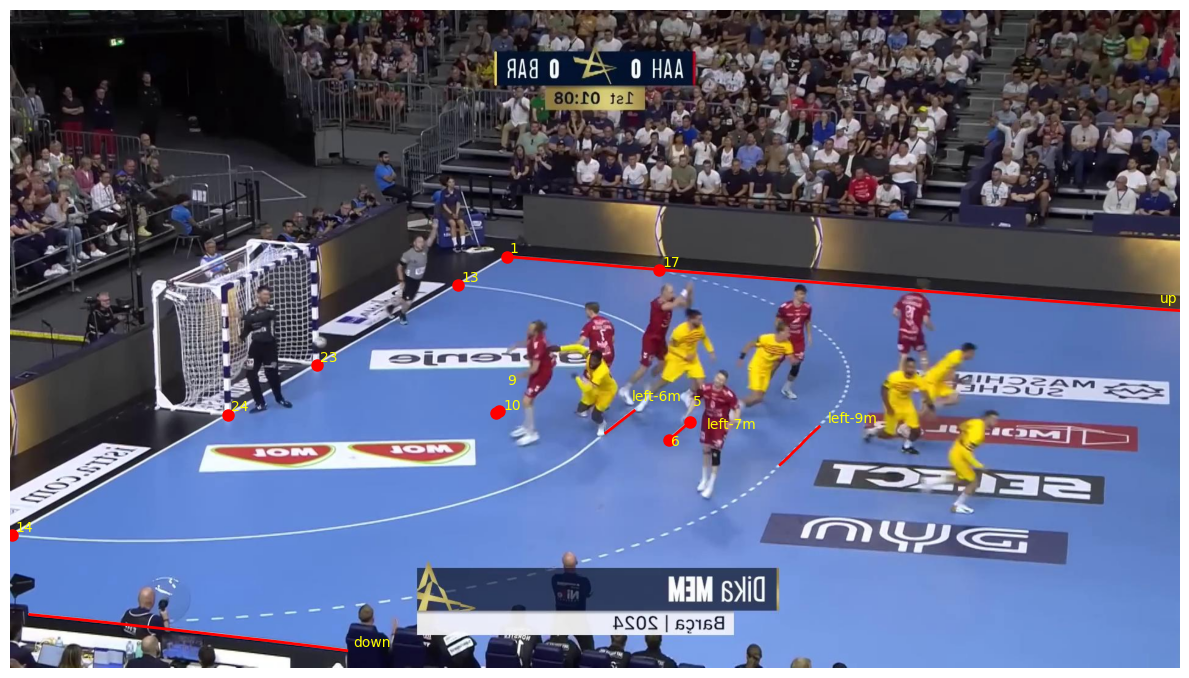

In [ ]:
show_image_with_keypoints("7_h.jpg")

can you check all jsons labels from the folder and if you find duplicated labels, print the json name and the label name and type

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's code to check for duplicate labels in each JSON file:

```python
import os
import json

dataset_path = 'clean_keypoints_dataset'
json_files = [f for f in os.listdir(dataset_path) if f.endswith('.json')]

for json_file in json_files:
    with open(f"{dataset_path}/{json_file}", 'r') as f:
        data = json.load(f)
    
    # Track labels we've seen
    seen_labels = {}
    
    for shape in data['shapes']:
        label = shape['label']
        shape_type = shape['shape_type']
        key = (label, shape_type)
        
        if key in seen_labels:
            print(f"{json_file}: duplicate label '{label}' ({shape_type})")
        else:
            seen_labels[key] = True
```

This will show you any files that have the same label appearing multiple times with the same type. Want to run it?

nothing happens when i run it, it doesnt appear to be running

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

If nothing happens, it likely means there are no duplicate labels in your JSON files - the code only prints when it finds duplicates.

Want me to modify it to also print a summary at the end, like "Checked X files, found Y duplicates" so you know it actually ran?

yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
import os
import json

dataset_path = 'clean_keypoints_dataset'
json_files = [f for f in os.listdir(dataset_path) if f.endswith('.json')]

duplicate_count = 0

for json_file in json_files:
    with open(f"{dataset_path}/{json_file}", 'r') as f:
        data = json.load(f)
    
    # Track labels we've seen
    seen_labels = {}
    
    for shape in data['shapes']:
        label = shape['label']
        shape_type = shape['shape_type']
        key = (label, shape_type)
        
        if key in seen_labels:
            print(f"{json_file}: duplicate label '{label}' ({shape_type})")
            duplicate_count += 1
        else:
            seen_labels[key] = True

print(f"\nChecked {len(json_files)} files, found {duplicate_count} duplicates")
```

This will show you the summary at the end!

In [ ]:
import os
import json

dataset_path = 'clean_keypoints_dataset'
json_files = [f for f in os.listdir(dataset_path) if f.endswith('.json')]

duplicate_count = 0

for json_file in json_files:
    with open(f"{dataset_path}/{json_file}", 'r') as f:
        data = json.load(f)
    
    # Track labels we've seen
    seen_labels = {}
    
    for shape in data['shapes']:
        label = shape['label']
        shape_type = shape['shape_type']
        key = (label, shape_type)
        
        if key in seen_labels:
            print(f"{json_file}: duplicate label '{label}' ({shape_type})")
            duplicate_count += 1
        else:
            seen_labels[key] = True

print(f"\nChecked {len(json_files)} files, found {duplicate_count} duplicates")



Checked 158 files, found 0 duplicates


also display the name of the image so that i know which one to check if i see errors

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good idea! Just add one line to the `next()` method to print the image name:

```python
def next(self):
    if self.index < len(self.images):
        print(f"Showing: {self.images[self.index]}")
        show_image_with_keypoints(self.images[self.index], self.dataset_path)
        self.index += 1
        print(f"Image {self.index}/{len(self.images)}")
    else:
        print("No more images!")
```

Update the method in your `ImageViewer` class and recreate the viewer.

modify the show_image_with_keypoints so that the labels are printed further away from each other, so that when there are overlapping or very close points you can still see the label

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

To prevent overlapping labels, we can add a small offset to each label's position. Here's a simple approach - add a small increment to the y-position for each label:

```python
# In the show_image_with_keypoints function, replace the text lines with:

if shape_type == 'linestrip':
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    ax.plot(xs, ys, 'r-', linewidth=2)
    ax.text(points[0][0] + 10, points[0][1] - 10, label, color='yellow', fontsize=10)
elif shape_type == 'point':
    ax.plot(points[0][0], points[0][1], 'ro', markersize=8)
    ax.text(points[0][0] + 10, points[0][1] - 10, label, color='yellow', fontsize=10)
```

The `+10` and `-10` offsets move labels slightly right and up from the points. Want to try adjusting these values to see what works best?

they still overlap

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The fixed offset isn't enough when points are very close together. We need a smarter approach that adjusts label positions based on nearby labels.

A few options:
1. Use matplotlib's `adjustText` library to automatically reposition overlapping labels
2. Manually space labels in a circular pattern around each point
3. Only show labels on hover (but this won't work well in solveit)

Would you like to try option 1 with `adjustText`? You'd need to install it first with `!pip install adjustText`.

yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! First, install the library:

```python
!pip install adjustText
```

Run that and let me know when it's done, then I'll show you how to update the function to use it.

In [ ]:
!pip install adjustText

ok next

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's the updated function using `adjustText`:

```python
import json
from PIL import Image
import matplotlib.pyplot as plt
from adjustText import adjust_text

def show_image_with_keypoints(image_name, dataset_path='clean_keypoints_dataset'):
    img_path = f"{dataset_path}/{image_name}"
    
    try:
        img = Image.open(img_path)
    except FileNotFoundError:
        print(f"Image not found: {img_path}")
        return
    
    json_path = img_path.replace('.jpg', '.json').replace('.png', '.json')
    
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"JSON annotation not found: {json_path}")
        return
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(img)
    
    texts = []
    for shape in data['shapes']:
        label = shape['label']
        points = shape['points']
        shape_type = shape['shape_type']
        
        if shape_type == 'linestrip':
            xs = [p[0] for p in points]
            ys = [p[1] for p in points]
            ax.plot(xs, ys, 'r-', linewidth=2)
            texts.append(ax.text(points[0][0], points[0][1], label, color='yellow', fontsize=10))
        elif shape_type == 'point':
            ax.plot(points[0][0], points[0][1], 'ro', markersize=8)
            texts.append(ax.text(points[0][0], points[0][1], label, color='yellow', fontsize=10))
    
    adjust_text(texts, ax=ax)
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()
```

Try it now with your viewer!

i need to use this dict HandballPitch.keypoint_ids to map the current labels to other labels. but im not sure exactly how this maps the labels. i will give you the code to explain the dict
class HandballPitch:
    PITCH_LENGTH = 40.0
    PITCH_WIDTH = 20.0
    GOAL_WIDTH = 3.0
    GOAL_AREA_DISTANCE = 6.0
    FREE_THROW_DISTANCE = 9.0
    PENALTY_DISTANCE = 7.0
    GOALKEEPER_DISTANCE = 4.0
    PENALTY_LINE_LENGTH = 1.0
    GOALKEEPER_LINE_LENGTH = 0.15
    FREE_THROW_SIDELINE_INTERSECTION_LENGTH = 2.958
    CENTER_CIRCLE_RADIUS = 2.0

    def __init__(self):
        hw,hl,gw = self.PITCH_WIDTH/2, self.PITCH_LENGTH/2, self.GOAL_WIDTH/2
        
        self.keypoints = dict(
            corner_left_up=(-hl, hw), corner_left_down=(-hl, -hw),
            corner_right_up=(hl, hw), corner_right_down=(hl, -hw),
            seven_left_up=(-hl + self.PENALTY_DISTANCE, self.PENALTY_LINE_LENGTH/2.0), seven_left_down=(-hl + self.PENALTY_DISTANCE, -self.PENALTY_LINE_LENGTH/2.0),
            seven_right_up=(hl - self.PENALTY_DISTANCE, self.PENALTY_LINE_LENGTH/2.0), seven_right_down=(hl - self.PENALTY_DISTANCE, -self.PENALTY_LINE_LENGTH/2.0),
            four_left_up=(-hl + self.GOALKEEPER_DISTANCE, self.GOALKEEPER_LINE_LENGTH/2.0), four_left_down=(-hl + self.GOALKEEPER_DISTANCE, -self.GOALKEEPER_LINE_LENGTH/2.0),
            four_right_up=(hl - self.GOALKEEPER_DISTANCE, self.GOALKEEPER_LINE_LENGTH/2.0), four_right_down=(hl - self.GOALKEEPER_DISTANCE, -self.GOALKEEPER_LINE_LENGTH/2.0),
            six_goalline_left_up=(-hl, self.GOAL_AREA_DISTANCE + gw), six_goalline_left_down=(-hl, -self.GOAL_AREA_DISTANCE - gw),
            six_goalline_right_up=(hl, self.GOAL_AREA_DISTANCE + gw), six_goalline_right_down=(hl, -self.GOAL_AREA_DISTANCE - gw),
            nine_sideline_left_up=(-hl + self.FREE_THROW_SIDELINE_INTERSECTION_LENGTH, hw), nine_sideline_left_down=(-hl + self.FREE_THROW_SIDELINE_INTERSECTION_LENGTH, -hw),
            nine_sideline_right_up=(hl - self.FREE_THROW_SIDELINE_INTERSECTION_LENGTH, hw), nine_sideline_right_down=(hl - self.FREE_THROW_SIDELINE_INTERSECTION_LENGTH, -hw),
            middle_sideline_up=(0.0, hw), middle_sideline_down=(0.0, -hw),
            goal_post_left_up=(-hl, gw), goal_post_left_down=(-hl, -gw),
            goal_post_right_up=(hl, gw), goal_post_right_down=(hl, -gw),
            center_circle_up=(0, self.CENTER_CIRCLE_RADIUS), center_circle_down=(0, -self.CENTER_CIRCLE_RADIUS)
            # seven_sideline_right_up=(hl - self.PENALTY_DISTANCE, hw),
            # nine_parallel_right_up=(hl - self.FREE_THROW_DISTANCE, gw), nine_parallel_right_down=(hl - self.FREE_THROW_DISTANCE, -gw),
            # six_goalline_parallel_right_up=(hl - self.GOAL_AREA_DISTANCE, gw), six_goalline_parallel_right_down=(hl - self.GOAL_AREA_DISTANCE, -gw),
            # four_sideline_intersection_right_up=(hl - self.GOALKEEPER_DISTANCE, hw), four_sideline_intersection_right_down=(hl - self.GOALKEEPER_DISTANCE, -hw)
        )
        
        self.keypoint_ids = {k: i for i,k in enumerate(self.keypoints.keys(), 1)}
        

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looking at the code, `keypoint_ids` creates a mapping from keypoint names (strings) to integer IDs.

It does this by enumerating through the `keypoints` dictionary keys, starting from 1. So:
- `'corner_left_up'` → 1
- `'corner_left_down'` → 2
- `'corner_right_up'` → 3
- etc.

So if your JSON annotations have labels like `"1"`, `"2"`, `"3"`, you'd need to reverse this mapping to convert those numbers back to the string names like `'corner_left_up'`.

Does your JSON use these numeric labels (1, 2, 3...) or something else?

yes, it uses numeric labels

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! So you need to reverse the mapping. You can create a reverse dictionary like this:

```python
id_to_keypoint = {v: k for k, v in HandballPitch.keypoint_ids.items()}
```

Then to convert a numeric label from your JSON (like `"3"`) to the keypoint name:

```python
keypoint_name = id_to_keypoint[int(label)]
```

Does that make sense for what you need?

In [ ]:
pitch = HandballPitch()
id_to_keypoint = {v: k for k, v in pitch.keypoint_ids.items()}
keypoint_name = id_to_keypoint[int("24")]
keypoint_name

'goal_post_left_down'

AttributeError: type object 'HandballPitch' has no attribute 'keypoint_ids'

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

`keypoint_ids` is an instance attribute, not a class attribute. You need to create an instance first:

```python
pitch = HandballPitch()
id_to_keypoint = {v: k for k, v in pitch.keypoint_ids.items()}
```

Try that instead!

ok good. now i need another function that shows an image from the dataset, but uses the warp_pitch_to_image() method to plot the image with the 2d pitch. the argument is img_pts that contains the mapped annotations using the keypoint_ids from above

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good! So you need a function that:
1. Takes an image name as input
2. Reads the JSON annotations
3. Converts the numeric labels to keypoint names using `id_to_keypoint`
4. Creates the `img_pts` dict in the format needed (e.g., `{'corner_right_up': (x, y), ...}`)
5. Calls `pitch.warp_pitch_to_image(img_pts)` with the image

Should I help you write this function, or would you like to try building it yourself first?

actually this is the function i need to call 
@patch
def warp_template_to_image(self:HandballPitch, template_path, img_path, img_pts, ax=None, figsize=(12,8)):
    "Warp pitch template image onto target image using homography"
    template = plt.imread(template_path)
    img = plt.imread(img_path)
    H = self.find_homography(img_pts)
    H_inv = np.linalg.inv(H)
    
    th,tw = template.shape[:2]
    hw,hl = self.PITCH_WIDTH/2, self.PITCH_LENGTH/2
    scale_x,scale_y = tw/(2*hl), th/(2*hw)
    
    T_template = np.array([[scale_x,0,tw/2],[0,scale_y,th/2],[0,0,1]])
    H_combined = H_inv @ np.linalg.inv(T_template)
    
    warped = cv2.warpPerspective(template, H_combined, (img.shape[1],img.shape[0]))
    
    if ax is None: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(img)
    ax.imshow(warped, alpha=0.5)
    ax.set_axis_off()
    return ax

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Got it! So you need to call `warp_template_to_image()` instead. This method needs:
- `template_path` - path to the pitch template image
- `img_path` - path to the image from your dataset
- `img_pts` - the mapped annotations dictionary

Do you have a pitch template image already, or do you need to create one first?

i dont have it but i may already have a function for it. is this is?

@patch
def show_warped_pitch_on_image(self:HandballPitch, image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig,ax = plt.subplots(figsize=(14,10))
    ax.imshow(img)

    pitch_corners = np.array([[-20,-10], [20,-10], [20,10], [-20,10], [-20,-10]], dtype=np.float32)
    img_corners = cv2.perspectiveTransform(pitch_corners.reshape(-1,1,2), np.linalg.inv(H)).reshape(-1,2)
    ax.plot(img_corners[:,0], img_corners[:,1], 'r-', linewidth=2)

    for name,pt in self.keypoints.items():
        img_pt = cv2.perspectiveTransform(np.array([[pt]], dtype=np.float32), np.linalg.inv(H))[0,0]
        ax.plot(img_pt[0], img_pt[1], 'ro', markersize=4)

    ax.set_axis_off()
    

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

This function is close, but it references `H` (the homography matrix) which isn't defined in the function - it would need to be calculated from `img_pts` first using `self.find_homography(img_pts)`.

So you still need to:
1. Read the JSON annotations for the image
2. Convert numeric labels to keypoint names
3. Create the `img_pts` dictionary
4. Calculate `H` from `img_pts`

Would you like help writing a function that does all of this?

so then what is the pitch template image?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The pitch template image is a top-down view of a handball pitch - basically an image showing what the pitch looks like from directly above, with all the lines, markings, and zones drawn on it.

It's what gets warped/transformed to match the perspective of your actual game images. Think of it like overlaying a "clean" pitch diagram onto the real broadcast footage.

Do you have such an image in your files, or would you need to create/download one?

yes i have one actually

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! What's the path to your template image? Once you have that, we can write a function that:
1. Reads the JSON for an image
2. Converts the numeric labels to keypoint names
3. Creates the `img_pts` dictionary
4. Calls `warp_template_to_image()` with all the needed parameters

What's the file path?

its in the same location as this notebook and its called pitch_template.jpg

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Now let's write the function. It needs to:
1. Load the JSON and convert numeric labels to keypoint names
2. Build the `img_pts` dict with only the 'point' type annotations (not linestrips)
3. Call `warp_template_to_image()`

Would you like to try writing this yourself, or should I write it for you?

write it

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's the function:

```python
def show_warped_pitch(image_name, dataset_path='clean_keypoints_dataset', template_path='pitch_template.jpg'):
    img_path = f"{dataset_path}/{image_name}"
    json_path = img_path.replace('.jpg', '.json').replace('.png', '.json')
    
    # Load JSON
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"JSON annotation not found: {json_path}")
        return
    
    # Create reverse mapping
    pitch = HandballPitch()
    id_to_keypoint = {v: k for k, v in pitch.keypoint_ids.items()}
    
    # Build img_pts dict from annotations
    img_pts = {}
    for shape in data['shapes']:
        if shape['shape_type'] == 'point':  # Only use point annotations
            label = shape['label']
            point = shape['points'][0]
            try:
                keypoint_name = id_to_keypoint[int(label)]
                img_pts[keypoint_name] = tuple(point)
            except (ValueError, KeyError):
                pass  # Skip if label isn't a valid numeric keypoint ID
    
    # Warp template onto image
    pitch.warp_template_to_image(template_path, img_path, img_pts)
```

Try it with one of your images!

do a test call of the function

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
show_warped_pitch("61.jpg")
```

In [ ]:
def show_warped_pitch(image_name, dataset_path='clean_keypoints_dataset', template_path='pitch_template.jpg'):
    img_path = f"{dataset_path}/{image_name}"
    json_path = img_path.replace('.jpg', '.json').replace('.png', '.json')
    
    # Load JSON
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"JSON annotation not found: {json_path}")
        return
    
    # Create reverse mapping
    pitch = HandballPitch()
    id_to_keypoint = {v: k for k, v in pitch.keypoint_ids.items()}
    
    # Build img_pts dict from annotations
    img_pts = {}
    for shape in data['shapes']:
        if shape['shape_type'] == 'point':  # Only use point annotations
            label = shape['label']
            point = shape['points'][0]
            try:
                keypoint_name = id_to_keypoint[int(label)]
                img_pts[keypoint_name] = tuple(point)
            except (ValueError, KeyError):
                pass  # Skip if label isn't a valid numeric keypoint ID
    
    # Warp template onto image
    pitch.warp_template_to_image(template_path, img_path, img_pts)


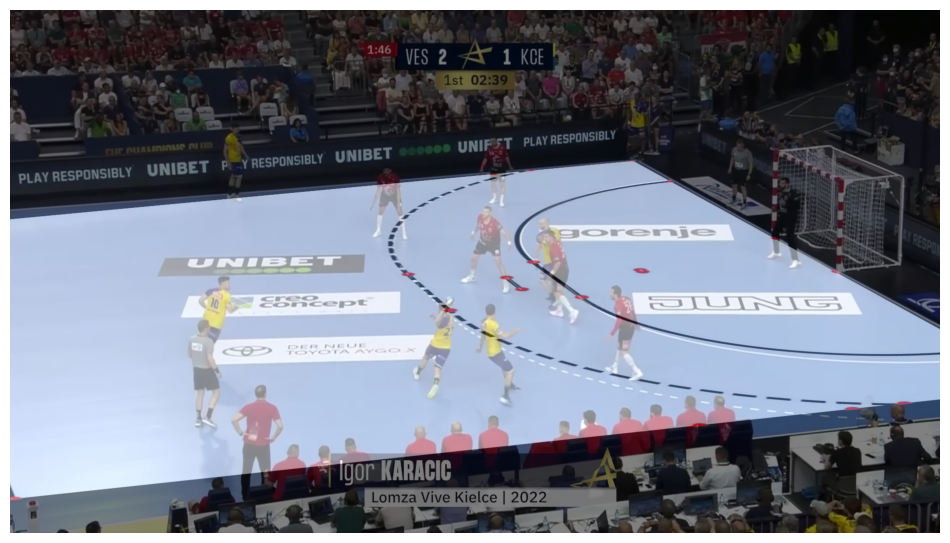

In [ ]:
show_warped_pitch("100.jpg")

i want to apply this function to all images that have annotations and save the result in a folder to see all of them

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You can loop through all annotated images and save each result. Here's how:

```python
import os

output_folder = 'warped_results'
os.makedirs(output_folder, exist_ok=True)

for img_name in viewer.images:
    # Call the function and save the figure
    show_warped_pitch(img_name)
    plt.savefig(f'{output_folder}/{img_name}')
    plt.close()

print(f"Saved {len(viewer.images)} images to {output_folder}/")
```

This will create a new folder and save all the warped pitch visualizations there. Want to try running it?

where will the folder be?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The folder will be created in the same directory where your notebook is running, which is `/app/data` (where your `clean_keypoints_dataset` folder is).

You can verify it exists after running the code with:

```python
!ls -la warped_results/
```

how can i access this folder locally on a mac?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You can download the folder from solveit to your Mac. First, compress it into a zip file:

```python
!zip -r warped_results.zip warped_results/
```

Then you can download the `warped_results.zip` file through your browser. The exact method depends on how you're accessing solveit - are you using a file browser in the interface, or would you need to use another method?

In [ ]:
output_folder = 'warped_results'
os.makedirs(output_folder, exist_ok=True)

for img_name in viewer.images:
    # Call the function and save the figure
    show_warped_pitch(img_name)
    plt.savefig(f'{output_folder}/{img_name}')
    plt.close()

print(f"Saved {len(viewer.images)} images to {output_folder}/")

this is taking too long to run, is it normal?

In [ ]:
import json
with open('clean_keypoints_dataset/7.json', 'r') as f:
    data = json.load(f)

for shape in data['shapes']:
    print(f"{shape['label']} - {shape['shape_type']}")